In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
from ar6_ch6_rcmipfigs.constants import INPUT_DATA_DIR_BADC, BASE_DIR
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR
from ar6_ch6_rcmipfigs.utils.badc_csv import read_csv_badc

/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


In [2]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic

<IPython.core.display.Javascript object>

In [3]:
output_name = 'fig_em_based_ERF_GSAT_period_1750-2019'

### Path input data

In [4]:
# PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
PATH_DATASET = OUTPUT_DATA_DIR / 'fig6_12_ts15_historic_delta_GSAT/dT_data_hist_recommendation.nc'

fn_ERF_2019 = OUTPUT_DATA_DIR / 'fig6_12_ts15_historic_delta_GSAT/2019_ERF_est.csv'
# fn_output_decomposition = OUTPUT_DATA_DIR / 'fig6_12_ts15_historic_delta_GSAT/hist_ERF_est_decomp.csv'

fn_ERF_timeseries = OUTPUT_DATA_DIR / 'fig6_12_ts15_historic_delta_GSAT/hist_ERF_est.csv'

fp_collins_sd = OUTPUT_DATA_DIR / 'fig6_12_ts15_historic_delta_GSAT/table_std_thornhill_collins_orignames.csv'

fn_TAB2_THORNHILL = INPUT_DATA_DIR_BADC / 'table2_thornhill2020.csv'

### Path output data

In [5]:
PATH_FIGURE_OUT = RESULTS_DIR / 'fig6_12_ts15'

### various definitions

**Set reference year for temperature change:**

In [6]:
ref_year = 1750
pd_year = 2019

In [7]:
# variables to plot:
variables_erf_comp = [
    'CO2', 'N2O', 'CH4', 'HC', 'NOx', 'SO2', 'BC', 'OC', 'NH3', 'VOC'
]
# total ERFs for anthropogenic and total:
variables_erf_tot = []
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:
scenarios_fl = []

In [8]:
varn = ['co2', 'N2O', 'HC', 'HFCs', 'ch4', 'o3', 'H2O_strat', 'ari', 'aci']
var_dir = ['CO2', 'N2O', 'HC', 'HFCs', 'CH4_lifetime', 'O3', 'Strat_H2O', 'Aerosol', 'Cloud']

Names for labeling:

In [9]:
rename_dic_cat = {
    'CO2': 'Carbon dioxide (CO$_2$)',
    'GHG': 'WMGHG',
    'CH4_lifetime': 'Methane (CH$_4$)',
    'O3': 'Ozone (O$_3$)',
    'Strat_H2O': 'H$_2$O (strat)',
    'Aerosol': 'Aerosol-radiation',
    'Cloud': 'Aerosol-cloud',
    'N2O': 'N$_2$O',
    'HC': 'CFC + HCFC',
    'HFCs': 'HFC'

}
rename_dic_cols = {
    'co2': 'CO$_2$',
    'CO2': 'CO$_2$',
    'CH4': 'CH$_4$',
    'ch4': 'CH$_4$',
    'N2O': 'N$_2$O',
    'n2o': 'N$_2$O',
    'HC': 'CFC + HCFC + HFC',
    'HFCs': 'HFC',
    'NOx': 'NO$_x$',
    'VOC': 'NMVOC + CO',
    'SO2': 'SO$_2$',
    'OC': 'Organic carbon',
    'BC': 'Black carbon',
    'NH3': 'Ammonia'
}

In [10]:
rn_dic_cat_o = {}
for key in rename_dic_cat.keys():
    rn_dic_cat_o[rename_dic_cat[key]]=key
rn_dic_cols_o = {}
for key in rename_dic_cols.keys():
    rn_dic_cols_o[rename_dic_cols[key]]=key

### Open ERF dataset:

In [11]:
ds = xr.open_dataset(PATH_DATASET)
ds  # ['Delta T']

<xarray.Dataset>
Dimensions:     (year: 270, variable: 10, percentile: 1)
Coordinates:
  * year        (year) int64 1750 1751 1752 1753 1754 ... 2016 2017 2018 2019
  * variable    (variable) object 'CO2' 'N2O' 'CH4' 'NOx' ... 'NH3' 'VOC' 'HC'
  * percentile  (percentile) object 'recommendation'
Data variables:
    ERF         (variable, year) float64 ...
    time        (year) datetime64[ns] ...
    delta_t     (year) float64 ...
    Delta T     (percentile, variable, year) float64 ...

### Overview plots

In [12]:
cols = get_cmap_dic(ds['variable'].values)

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.26666666666666666, 0.0, 0.5254901960784314)
(0.3764705882352941, 0.5725490196078431, 0.796078431372549)
(0.5411764705882353, 0.2235294117647059, 0.0)
(0.4745098039215686, 0.792156862745098, 0.9333333333333333)
(0.0, 0.6901960784313725, 0.6039215686274509)
(0.0, 0.5019607843137255, 0.23137254901960785)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)


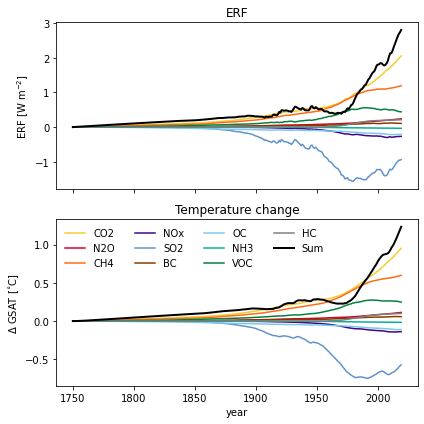

In [13]:
fig, axs = plt.subplots(2, sharex=True, figsize=[6, 6])

ax_erf = axs[0]
ax_dT = axs[1]
for v in ds['variable'].values:
    ds.sel(variable=v)['Delta T'].plot(ax=ax_dT, label=v, c=cols[v])
    ds.sel(variable=v)['ERF'].plot(ax=ax_erf, c=cols[v])
ds.sum('variable')['Delta T'].plot(ax=ax_dT, label='Sum', c='k', linewidth=2)
ds.sum('variable')['ERF'].plot(ax=ax_erf, c='k', linewidth=2)

ax_dT.set_title('Temperature change')
ax_erf.set_title('ERF')
ax_erf.set_ylabel('ERF [W m$^{-2}$]')
ax_dT.set_ylabel('$\Delta$ GSAT [$^{\circ}$C]')
ax_erf.set_xlabel('')
ax_dT.legend(ncol=4, loc='upper left', frameon=False)
plt.tight_layout()
#fig.savefig('hist_timeseries_ERF_dT.png', dpi=300)

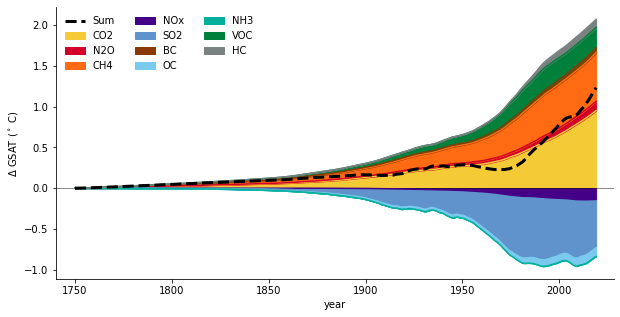

In [14]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']

col_list = [cols[c] for c in df_deltaT.columns]

df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']

fig, ax = plt.subplots(figsize=[10, 5])
ax.hlines(0, 1740, 2028, linestyle='solid', alpha=0.9, color='k',
          linewidth=0.5)  # .sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3)

df_deltaT.plot.area(color=col_list, ax=ax)
df_deltaT.sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3, label='Sum')
plt.legend(loc='upper left', ncol=3, frameon=False)
plt.ylabel('$\Delta$ GSAT ($^\circ$ C)')
ax.set_xlim([1740, 2028])
sns.despine()

# Split up ERF/warming into sources by using data from Thornhill

We use the original split up in ERF from Thornhill/Bill Collin's plot 

Open dataset from Bill Collin's script:

In [15]:
df_collins = pd.read_csv(fn_ERF_2019, index_col=0)
df_collins.index = df_collins.index.rename('emission_experiment')
df_collins_sd = pd.read_csv(fp_collins_sd, index_col=0)
df_collins

,CO2,CH4_lifetime,Strat_H2O,Aerosol,Cloud,O3,HC,N2O,HFCs
emission_experiment,,,,,,,,,
CO2,2.057554,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000
CH4,0.017549,0.844457,0.05,-0.002653,0.018421,0.266736,0.00,0.00,0.000000
N2O,0.000000,-0.035967,0.00,-0.002090,0.042503,0.026124,0.00,0.21,0.000000
HC,0.000053,-0.050927,0.00,-0.008080,-0.017419,-0.162033,0.41,0.00,0.039772
NOx,0.000000,-0.380025,0.00,-0.009166,-0.014458,0.137102,0.00,0.00,0.000000
VOC,0.069491,0.162462,0.00,-0.002573,0.008884,0.202071,0.00,0.00,0.000000
SO2,0.000000,0.000000,0.00,-0.234228,-0.703784,0.000000,0.00,0.00,0.000000
OC,0.000000,0.000000,0.00,-0.072143,-0.136919,0.000000,0.00,0.00,0.000000
BC,0.000000,0.000000,0.00,0.144702,-0.037227,0.000000,0.00,0.00,0.000000


In [16]:
width = 0.7
kwargs = {'linewidth': .1, 'edgecolor': 'k'}

## Decompose GSAT signal as the ERF signal

### GSAT

Get period mean difference for GSAT:

In [17]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']
PD = df_deltaT.loc[pd_year]
PD

PI = df_deltaT.loc[ref_year]  # .mean()

dT_period_diff = pd.DataFrame(PD - PI, columns=['diff'])  # df_deltaT.loc[2019])
dT_period_diff.index = dT_period_diff.index.rename('emission_experiment')

Make normalized decomposition of different components from emission based ERF. 

<AxesSubplot:ylabel='emission_experiment'>

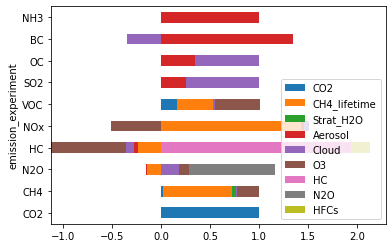

In [18]:
df_coll_t = df_collins.transpose()
if 'Total' in df_coll_t.index:
    df_coll_t = df_coll_t.drop('Total')
# scale by total:
scale = df_coll_t.sum()
# normalized ERF: 
df_col_normalized = df_coll_t / scale
#
df_col_normalized.transpose().plot.barh(stacked=True)

We multiply the change in GSAT in 2010-2019 vs 1850-1900 by the matrix describing the source distribution from the ERF:

In [19]:
dT_period_diff['diff']

emission_experiment
CO2    0.951383
N2O    0.113355
CH4    0.597743
NOx   -0.138133
SO2   -0.571412
BC     0.057791
OC    -0.111211
NH3   -0.016250
VOC    0.247976
HC     0.099777
Name: diff, dtype: float64

In [20]:
df_dt_sep = dT_period_diff['diff'] * df_col_normalized

df_dt_sep = df_dt_sep.transpose()
df_dt_sep

,CO2,CH4_lifetime,Strat_H2O,Aerosol,Cloud,O3,HC,N2O,HFCs
emission_experiment,,,,,,,,,
BC,0.000000,0.000000,0.00000,0.077809,-0.020018,0.000000,0.000000,0.000000,0.000000
CH4,0.008782,0.422574,0.02502,-0.001328,0.009218,0.133477,0.000000,0.000000,0.000000
CO2,0.951383,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HC,0.000025,-0.024040,0.00000,-0.003814,-0.008223,-0.076489,0.193544,0.000000,0.018775
N2O,0.000000,-0.016948,0.00000,-0.000985,0.020027,0.012309,0.000000,0.098951,0.000000
NH3,0.000000,0.000000,0.00000,-0.016250,0.000000,0.000000,0.000000,0.000000,0.000000
NOx,0.000000,-0.196941,0.00000,-0.004750,-0.007493,0.071051,0.000000,0.000000,0.000000
OC,0.000000,0.000000,0.00000,-0.038377,-0.072834,0.000000,0.000000,0.000000,0.000000
SO2,0.000000,0.000000,0.00000,-0.142685,-0.428727,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='emission_experiment'>

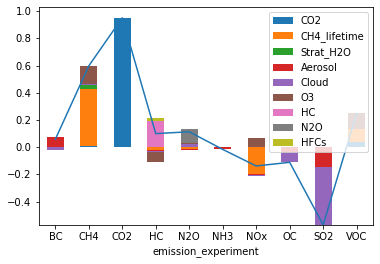

In [21]:
df_dt_sep.plot.bar(stacked=True)
dT_period_diff['diff'].reindex(df_dt_sep.index).plot()

### ERF

Get period mean difference for ERF:

In [22]:
df_ERF = ds['ERF'].squeeze().to_dataframe().unstack('variable')['ERF']
ERF_PD = df_ERF.loc[pd_year]

ERF_PI = df_ERF.loc[ref_year]

In [23]:
ERF_period_diff = pd.DataFrame(ERF_PD - ERF_PI, columns=['diff'])  # df_deltaT.loc[2019])
ERF_period_diff.index = ERF_period_diff.index.rename('emission_experiment')


We multiply the change in ERF in 2010-2019 vs 1850-1900 by the matrix describing the source distribution from the ERF:

In [24]:
df_erf_sep = ERF_period_diff['diff'] * df_col_normalized
df_erf_sep = df_erf_sep.transpose()

In [25]:
ERF_period_diff

,diff
emission_experiment,
CO2,2.057554
N2O,0.240569
CH4,1.194509
NOx,-0.266546
SO2,-0.938012
BC,0.107475
OC,-0.209062
NH3,-0.033769
VOC,0.440334


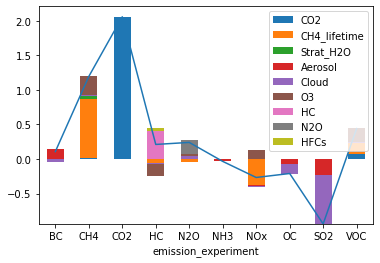

In [26]:
df_erf_sep.plot.bar(stacked=True)
ERF_period_diff['diff'].reindex(df_erf_sep.index).plot.line()
plt.show()

# Accounting for non-linearities in ERFaci, we scale down the GSAT change from aci contribution to fit with chapter 7 

The GSAT change from aerosol cloud interactions in 2019 vs 1750 is estimated to -0.38 degrees by chapter 7, which accounts for non-linearities in ERFaci. When considering the 1750-2019 change in GSAT, we therefore scaled the GSAT change by aerosol cloud interactions to fit this total. 

In [27]:
df_dt_sep.sum()

CO2             0.999324
CH4_lifetime    0.276136
Strat_H2O       0.025020
Aerosol        -0.131829
Cloud          -0.503046
O3              0.254145
HC              0.193544
N2O             0.098951
HFCs            0.018775
dtype: float64

In [28]:
scal_to = -0.38
aci_tot = df_dt_sep.sum()['Cloud']
scale_by = scal_to / aci_tot
print('Scaled down by ', (1 - scale_by) * 100, '%')
print(scal_to, aci_tot)

df_dt_sep['Cloud'] = df_dt_sep['Cloud'] * scale_by
df_dt_sep.sum()

Scaled down by  24.46016383440439 %
-0.38 -0.5030458355336888


CO2             0.999324
CH4_lifetime    0.276136
Strat_H2O       0.025020
Aerosol        -0.131829
Cloud          -0.380000
O3              0.254145
HC              0.193544
N2O             0.098951
HFCs            0.018775
dtype: float64

# Uncertainties

In [29]:

num_mod_lab = 'Number of models (Thornhill 2020)'
thornhill = read_csv_badc(fn_TAB2_THORNHILL, index_col=0)
thornhill.index = thornhill.index.rename('Species')
thornhill

# ratio between standard deviation and 5-95th percentile.
std_2_95th = 1.645

sd_tot = df_collins_sd['Total_sd']
df_err = pd.DataFrame(sd_tot.rename('std'))
df_err['SE'] = df_err

df_err['SE'] = df_err['std'] / np.sqrt(thornhill[num_mod_lab])
df_err['95-50_SE'] = df_err['SE'] * std_2_95th
df_err.loc['CO2', '95-50_SE'] = df_err.loc['CO2', 'std']
df_err

df_err['95-50'] = df_err['std'] * std_2_95th
# CO2 is already 95-50 percentile: 
df_err.loc['CO2', '95-50'] = df_err.loc['CO2', 'std']
df_err

,std,SE,95-50_SE,95-50
Species,,,,
CO2,0.246907,NaN,0.246907,0.246907
CH4,0.236538,0.083629,0.137569,0.389105
N2O,0.061736,0.027609,0.045417,0.101555
HC,0.116583,0.047595,0.078293,0.191779
NOx,0.170036,0.076043,0.125090,0.279710
VOC,0.136683,0.061127,0.100553,0.224844
SO2,0.419710,0.171346,0.281864,0.690423
OC,0.139932,0.057127,0.093974,0.230188
BC,0.187990,0.071053,0.116883,0.309243


## Uncertainty on period mean ERF is scaled from uncertainty in 2019: 


In [30]:
ERF_2019_tot = df_collins.sum(axis=1).reindex(df_err.index)
ERF_period_diff_tot = df_erf_sep.sum(axis=1).reindex(df_err.index)

Scale by the period mean to the original 1750-2019 difference. 

In [31]:
_scale = np.abs(ERF_period_diff_tot / ERF_2019_tot)
df_err['95-50_period'] = df_err['95-50'] * _scale
_scale

Species
CO2    1.0
CH4    1.0
N2O    1.0
HC     1.0
NOx    1.0
VOC    1.0
SO2    1.0
OC     1.0
BC     1.0
NH3    1.0
dtype: float64

(In the case of period=2019 vs 1750, the scaling is 1, i.e. no scaling)

In [32]:
df_err

,std,SE,95-50_SE,95-50,95-50_period
Species,,,,,
CO2,0.246907,NaN,0.246907,0.246907,0.246907
CH4,0.236538,0.083629,0.137569,0.389105,0.389105
N2O,0.061736,0.027609,0.045417,0.101555,0.101555
HC,0.116583,0.047595,0.078293,0.191779,0.191779
NOx,0.170036,0.076043,0.125090,0.279710,0.279710
VOC,0.136683,0.061127,0.100553,0.224844,0.224844
SO2,0.419710,0.171346,0.281864,0.690423,0.690423
OC,0.139932,0.057127,0.093974,0.230188,0.230188
BC,0.187990,0.071053,0.116883,0.309243,0.309243


## Uncertainties $\Delta$ GSAT


\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

most of the uncertainty in the IRF derives from the uncertainty in the climate sensitivity which is said 3 (2.5-4), i.e. relative std 0.5/3 for the lower and 1/3 for the higher. If we treat this as two independent normally distributed variables multiplied together, $X$ and $Y$ and $X \cdot Y$, we may propagate the uncertainty: 

\begin{align*} 
\frac{\sigma_{XY}^2}{(XY)^2} = \Big[(\frac{\sigma_X}{X})^2 + (\frac{\sigma_Y}{Y})^2 \Big]
\end{align*}

In [33]:
ERF_2019_tot

Species
CO2    2.057554
CH4    1.194509
N2O    0.240569
HC     0.211366
NOx   -0.266546
VOC    0.440334
SO2   -0.938012
OC    -0.209062
BC     0.107475
NH3   -0.033769
dtype: float64

In [34]:
std_ERF = df_err['std']
std_ECS_lw_rl = 0.5 / 3
std_ECS_hg_rl = 1 / 3

tot_ERF = ERF_2019_tot  # df_collins.loc[::-1,var_dir].reindex(std_ERF.index).sum(axis=1)#tab_plt_ERF.sum(axis=1)
std_erf_rl = np.abs(std_ERF / tot_ERF)
std_erf_rl  # .rename(rename_dic_cols)

Species
CO2    0.120000
CH4    0.198021
N2O    0.256624
HC     0.551568
NOx    0.637925
VOC    0.310408
SO2    0.447446
OC     0.669331
BC     1.749148
NH3    0.142857
dtype: float64

In [35]:
def rel_sigma_prod(rel_sigmaX, rel_sigmaY):
    var_prod_rel = (rel_sigmaX ** 2 + rel_sigmaY ** 2)
    rel_sigma_product = np.sqrt(var_prod_rel)
    return rel_sigma_product


rel_sig_lw = rel_sigma_prod(std_erf_rl, std_ECS_lw_rl)
rel_sig_hg = rel_sigma_prod(std_erf_rl, std_ECS_hg_rl)

In [36]:
tot_dT = df_dt_sep.sum(axis=1).reindex(std_ERF.index)

neg_v = (tot_dT < 0)  # .squeeze()

In [37]:
std_2_95th

1.645

In [38]:
rel_sig_hg

Species
CO2    0.354275
CH4    0.387716
N2O    0.420674
HC     0.644468
NOx    0.719763
VOC    0.455482
SO2    0.557960
OC     0.747740
BC     1.780626
NH3    0.362656
dtype: float64

In [39]:
err_dT = pd.DataFrame(index=tot_dT.index)
err_dT['min 1 sigma'] = np.abs(tot_dT * rel_sig_lw)  # *tot_dT
err_dT['plus 1 sigma'] = np.abs(tot_dT * rel_sig_hg)
err_dT['plus 1 sigma'][neg_v] = np.abs(tot_dT * rel_sig_lw)[neg_v]  # .iloc[neg_v].iloc[neg_v].iloc[neg_v]
err_dT['min 1 sigma'][neg_v] = np.abs(tot_dT * rel_sig_hg)[neg_v]  # .iloc[neg_v].iloc[neg_v].iloc[neg_v]
# err_dT['min 1 sigma'].iloc[neg_v] =np.abs(tot_dT*rel_sig_hg).iloc[neg_v]
# err_dT['plus 1 sigma'][neg_v] = np.abs(tot_dT*rel_sig_lw)[neg_v]
# err_dT['min 1 sigma'][neg_v] = np.abs(tot_dT*rel_sig_hg)[neg_v]
# [::-1]
err_dT['p50-05'] = err_dT['min 1 sigma'] * std_2_95th
err_dT['p95-50'] = err_dT['plus 1 sigma'] * std_2_95th
err_dT
err_dT = err_dT.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
# var_nn_dir = [rename_dic_cols[v] for v in varn]

In [40]:
df_err = df_err.rename(rename_dic_cols, axis=0)

# Reorder and rename

In [41]:
exps_ls = ['CO2', 'CH4', 'N2O', 'HC', 'NOx', 'VOC', 'SO2', 'OC', 'BC', 'NH3']

In [42]:
tab_plt_dT = df_dt_sep.loc[::-1, var_dir]  # .rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt_dT = tab_plt_dT.loc[exps_ls]
tab_plt_dT = tab_plt_dT.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)

In [43]:
tab_plt_erf = df_erf_sep.loc[::-1, var_dir]  # .rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt_erf = tab_plt_erf.loc[exps_ls]
tab_plt_erf = tab_plt_erf.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt_erf = tab_plt_erf  # .T

In [44]:
cmap = get_cmap_dic(var_dir)
col_ls = [cmap[c] for c in cmap.keys()]

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


In [45]:
ybar = np.arange(len(tab_plt_erf.T) + 1)  # , -1)

In [46]:
index_order = tab_plt_dT[::-1].index
index_order

Index(['Ammonia', 'Black carbon', 'Organic carbon', 'SO$_2$', 'NMVOC + CO',
       'NO$_x$', 'CFC + HCFC + HFC', 'N$_2$O', 'CH$_4$', 'CO$_2$'],
      dtype='object', name='emission_experiment')

# Plot

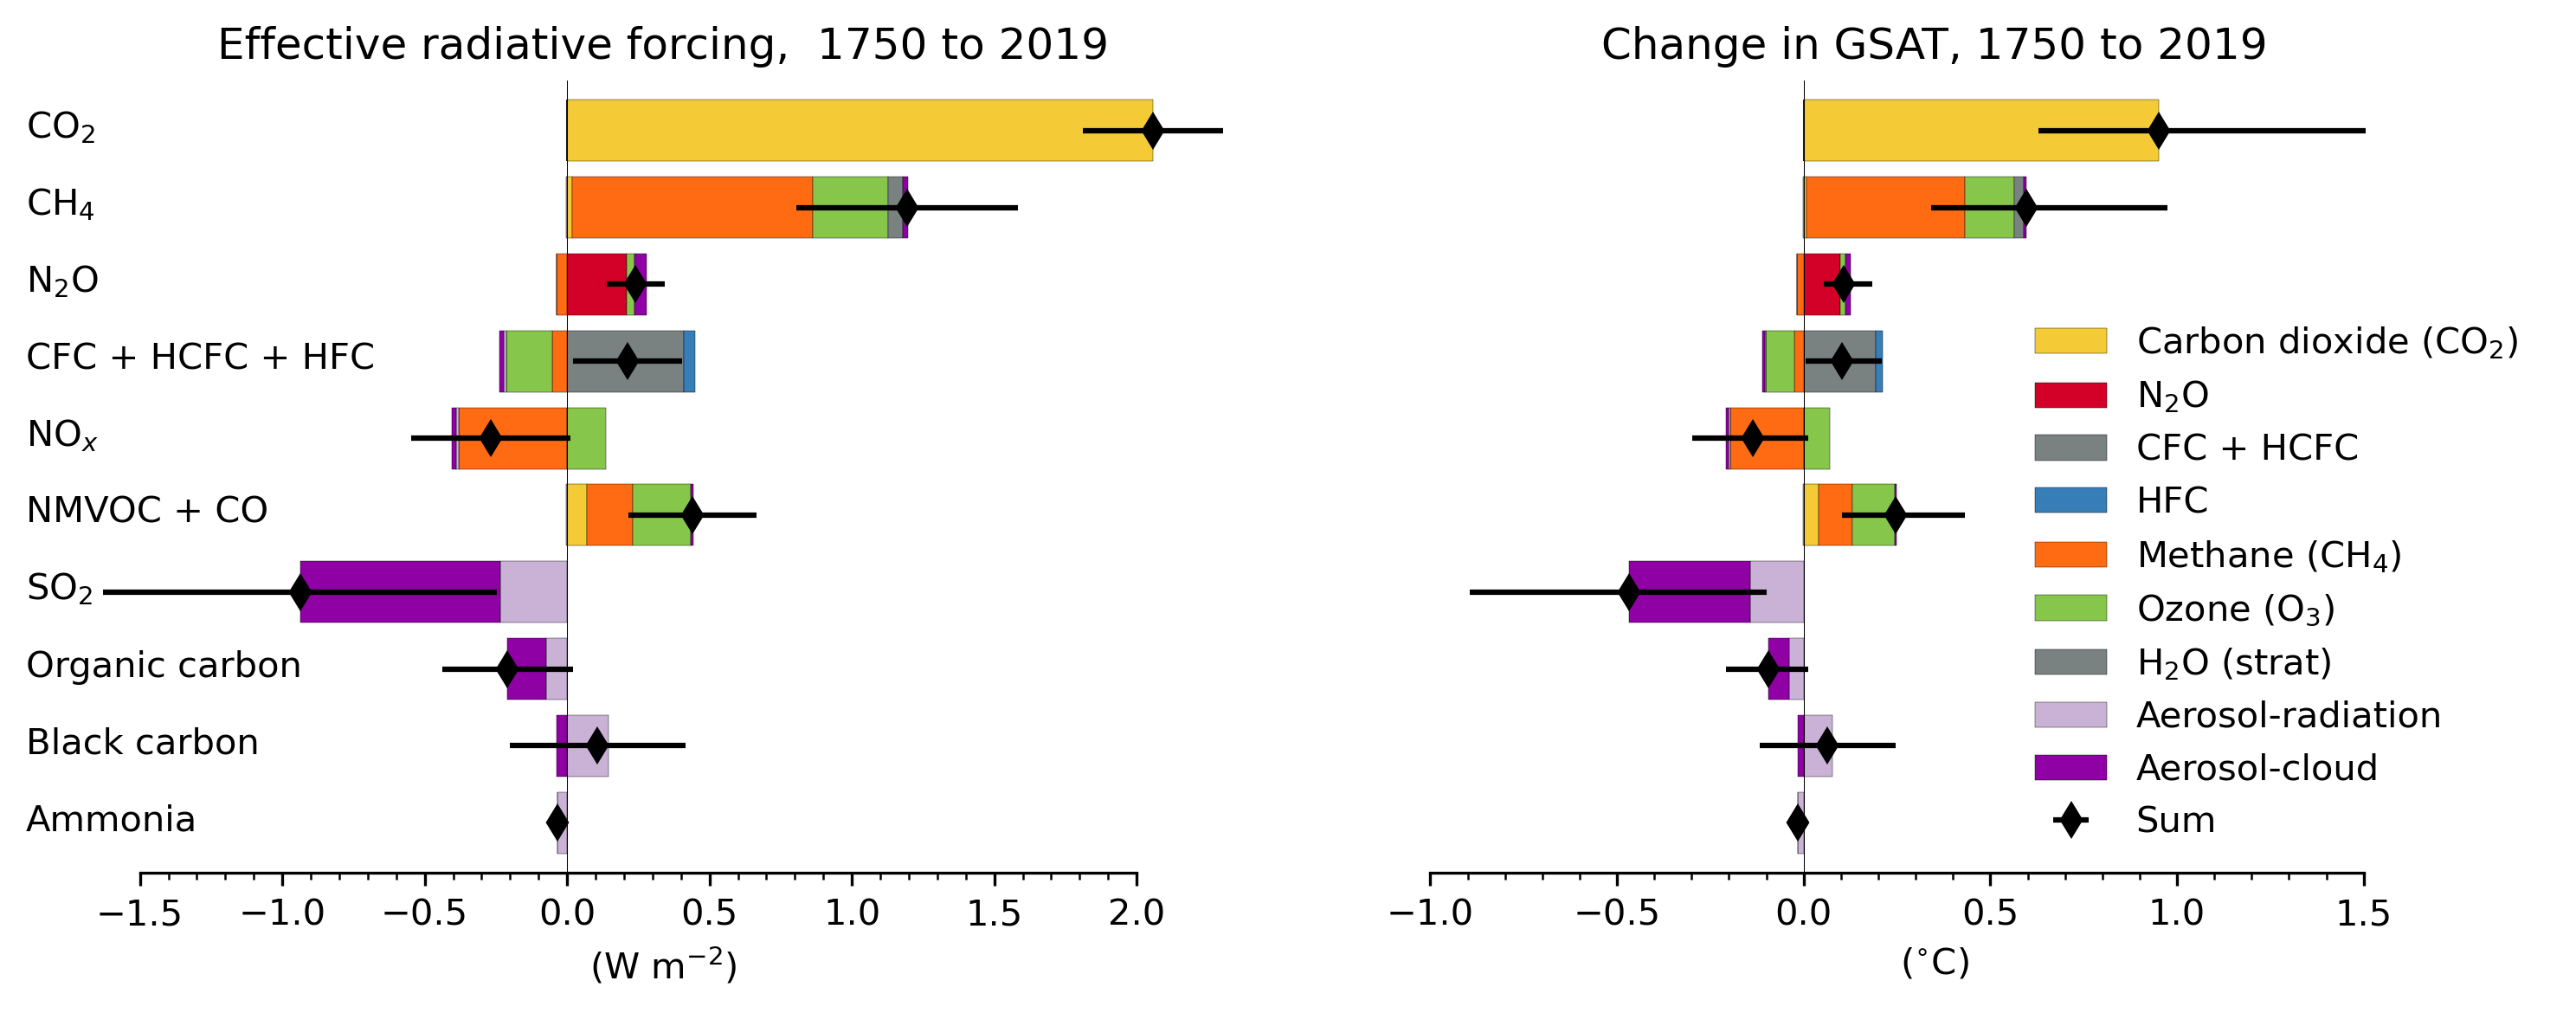

In [47]:
sns.set_style()
fig, axs = plt.subplots(1, 2, dpi=300, figsize=[10, 4])  # , dpi=150)
width = .8
kws = {
    'width': .8,
    'linewidth': .1,
    'edgecolor': 'k',

}

ax = axs[0]
ax.axvline(x=0., color='k', linewidth=0.25)

tab_plt_erf.reindex(index_order).plot.barh(stacked=True, color=col_ls, ax=ax, **kws)
# tot = table['Total'][::-1]
tot = tab_plt_erf.reindex(index_order).sum(axis=1)  # tab_plt
xerr = df_err['95-50_period'].reindex(index_order)
y = np.arange(len(tot))
ax.errorbar(tot, y, xerr=xerr, marker='d', linestyle='None', color='k', label='Sum', )
# ax.legend(frameon=False)
ax.set_ylabel('')

for lab, y in zip(index_order, ybar):
    # plt.text(-1.55, ybar[i], species[i],  ha='left')#, va='left')
    ax.text(-1.9, y - 0.1, lab, ha='left')  # , va='left')
ax.set_title('Effective radiative forcing,  1750 to 2019')
ax.set_xlabel(r'(W m$^{-2}$)')
# ax.set_xlim(-1.5, 2.6)
# plt.xlim(-1.6, 2.0)
# sns.despine(fig, left=True, trim=True)
ax.legend(loc='lower right', frameon=False)
ax.set_yticks([])

ax.get_legend().remove()

ax.set_xticks(np.arange(-1.5, 2.1, .5))
ax.set_xticks(np.arange(-1.5, 2, .1), minor=True)

ax = axs[1]
ax.axvline(x=0., color='k', linewidth=0.25)

tab_plt_dT.reindex(index_order).plot.barh(stacked=True, color=col_ls, ax=ax, **kws)
tot = tab_plt_dT.reindex(index_order).sum(axis=1)
# xerr =0# df_err['95-50'][::-1]
y = np.arange(len(tot))
xerr_dT = err_dT[['p50-05', 'p95-50']].reindex(index_order).transpose().values
ax.errorbar(tot, y,
            xerr=xerr_dT,
            # xerr=err_dT[['min 1 sigma','plus 1 sigma']].loc[tot.index].transpose().values,
            marker='d', linestyle='None', color='k', label='Sum', )
# ax.legend(frameon=False)
ax.set_ylabel('')

ax.set_title('Change in GSAT, 1750 to 2019')
ax.set_xlabel(r'($^{\circ}$C)')
ax.set_xlim(-1.3, 1.8)

sns.despine(fig, left=True, trim=True)
ax.spines['bottom'].set_bounds(-1., 1.5)
ax.legend(loc='lower right', frameon=False)

ax.set_xticks(np.arange(-1, 2.1, .5))
# ax.xaxis.set_major_locator(MultipleLocator(.5))

ax.set_xticks(np.arange(-1, 1.6, .5))
ax.set_xticks(np.arange(-1, 1.5, .1), minor=True)

fn = output_name + '.png'
fp = PATH_FIGURE_OUT / fn
fp.parent.mkdir(parents=True, exist_ok=True)
ax.set_yticks([])
fig.tight_layout()
plt.savefig(fp, dpi=300, bbox_inches='tight')
plt.savefig(fp.with_suffix('.pdf'), dpi=300, bbox_inches='tight')
plt.savefig(fp.with_suffix('.png'), dpi=300, bbox_inches='tight')
plt.show()

In [48]:
tab_plt_erf.T.sum(axis=0)

emission_experiment
CO$_2$              2.057554
CH$_4$              1.194509
N$_2$O              0.240569
CFC + HCFC + HFC    0.211366
NO$_x$             -0.266546
NMVOC + CO          0.440334
SO$_2$             -0.938012
Organic carbon     -0.209062
Black carbon        0.107475
Ammonia            -0.033769
dtype: float64

In [49]:
tab_plt_dT.sum(axis=1)

emission_experiment
CO$_2$              0.951383
CH$_4$              0.595488
N$_2$O              0.108457
CFC + HCFC + HFC    0.101789
NO$_x$             -0.136300
NMVOC + CO          0.246752
SO$_2$             -0.466545
Organic carbon     -0.093395
Black carbon        0.062687
Ammonia            -0.016250
dtype: float64

In [50]:
tab_plt_dT.sum()

Carbon dioxide (CO$_2$)    0.999324
N$_2$O                     0.098951
CFC + HCFC                 0.193544
HFC                        0.018775
Methane (CH$_4$)           0.276136
Ozone (O$_3$)              0.254145
H$_2$O (strat)             0.025020
Aerosol-radiation         -0.131829
Aerosol-cloud             -0.380000
dtype: float64

# Write vales to csv

In [51]:
tab_plt_erf

,Carbon dioxide (CO$_2$),N$_2$O,CFC + HCFC,HFC,Methane (CH$_4$),Ozone (O$_3$),H$_2$O (strat),Aerosol-radiation,Aerosol-cloud
emission_experiment,,,,,,,,,
CO$_2$,2.057554,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
CH$_4$,0.017549,0.00,0.00,0.000000,0.844457,0.266736,0.05,-0.002653,0.018421
N$_2$O,0.000000,0.21,0.00,0.000000,-0.035967,0.026124,0.00,-0.002090,0.042503
CFC + HCFC + HFC,0.000053,0.00,0.41,0.039772,-0.050927,-0.162033,0.00,-0.008080,-0.017419
NO$_x$,0.000000,0.00,0.00,0.000000,-0.380025,0.137102,0.00,-0.009166,-0.014458
NMVOC + CO,0.069491,0.00,0.00,0.000000,0.162462,0.202071,0.00,-0.002573,0.008884
SO$_2$,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,-0.234228,-0.703784
Organic carbon,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,-0.072143,-0.136919
Black carbon,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.144702,-0.037227


In [52]:
df_err

,std,SE,95-50_SE,95-50,95-50_period
Species,,,,,
CO$_2$,0.246907,NaN,0.246907,0.246907,0.246907
CH$_4$,0.236538,0.083629,0.137569,0.389105,0.389105
N$_2$O,0.061736,0.027609,0.045417,0.101555,0.101555
CFC + HCFC + HFC,0.116583,0.047595,0.078293,0.191779,0.191779
NO$_x$,0.170036,0.076043,0.125090,0.279710,0.279710
NMVOC + CO,0.136683,0.061127,0.100553,0.224844,0.224844
SO$_2$,0.419710,0.171346,0.281864,0.690423,0.690423
Organic carbon,0.139932,0.057127,0.093974,0.230188,0.230188
Black carbon,0.187990,0.071053,0.116883,0.309243,0.309243


In [53]:
from ar6_ch6_rcmipfigs.utils.badc_csv import write_badc_header

### Write plotted data to file

In [54]:
dic_head = dict(
    title='Data for Figure 6.12, emission based ERF and warming for the historical period',
    last_revised_date='2021-06-29',
    location='global',
    reference='https://github.com/sarambl/AR6_CH6_RCMIPFIGS/',
    source='IPCC AR6 output',
    creator='Sara Marie Blichner (s.m.blichner@geo.uio.no)',

)
add_global_comments = [
    ['comments', 'G', 'This data is based on various input datasets,'],
    ['comments', 'G', 'please see https://github.com/sarambl/AR6_CH6_RCMIPFIGS for methods'],
]


def get_add_global_from_dic(_dic_head):
    add_global = [[key, 'G', _dic_head[key]] for key in _dic_head.keys()]
    add_global = add_global + add_global_comments
    return add_global


path_header_def = BASE_DIR / 'misc/header_empty.csv'
path_header_def.exists()


def to_csv_w_header(df, var_name, perc, _ref_year, end_year, fn, 
                   unit):
    fn_out = RESULTS_DIR / fn
    df_out = df.rename(rn_dic_cat_o, axis=1)
    df_out  = df_out.rename(rn_dic_cols_o)
    df_out.to_csv(fn_out)

    dic_head['title'] = get_title(perc, var_name)

    add_global = get_add_global_from_dic(dic_head)

    write_badc_header(fn_out, fn_out, add_global, default_unit=unit,
                      fp_global_default=path_header_def,
                      fp_var_default=path_header_def)

def get_title(perc,var):
    if perc == 'mean':
        txt = f'Data for Figure 6.12,  emission based {var} for the historical period'
    else:
        txt = f'Data for Figure 6.12, uncertainty in emission based {var} and warming for the historical period'
    
    return txt



In [55]:
fn = output_name + '_values_ERF.csv'
fp = PATH_FIGURE_OUT / fn

to_csv_w_header(tab_plt_erf, 'ERF', 'mean', '', '', fp, 
                   'W/m2')

fn = output_name + '_values_ERF_uncertainty.csv'
fp = PATH_FIGURE_OUT / fn
df_err.to_csv(fp)
to_csv_w_header(df_err, 'ERF', 'uncertainty', '', '', fp, 
                   'W/m2')

fn = output_name + '_values_dT.csv'
fp = PATH_FIGURE_OUT/ fn
to_csv_w_header(tab_plt_dT, 'warming', 'mean', '', '', fp, 
                   'degrees C')

fn = output_name + '_values_dT_uncertainty.csv'
fp = PATH_FIGURE_OUT / fn
to_csv_w_header(err_dT, 'warming', 'uncertainty', '', '', fp, 
                   'degrees C')